# Problem 3 Prediction of Severity of Illness Based On Age and Length of Stay at the Hospital

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("hospital.csv")

dropped = data.drop(['Operating Certificate Number', 'Facility Id', 'Zip Code - 3 digits', 'Payment Typology 2', 'Payment Typology 3', 'Attending Provider License Number', 'Operating Provider License Number', 
           'Other Provider License Number', 'Birth Weight','Ethnicity','Patient Disposition','Discharge Year','CCS Diagnosis Code','CCS Diagnosis Description','CCS Procedure Code','CCS Procedure Description','APR DRG Code','APR MDC Code',
                    'Health Service Area', 'Hospital County', 'Type of Admission', 'Abortion Edit Indicator', 'Emergency Department Indicator'], axis = 1)
dropped.shape

/Users/michaeldu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2346760, 14)

In [2]:
MountSinai = dropped[(dropped['Facility Name'] == 'Mount Sinai Hospital')]

In [3]:
from sklearn import svm

AAL = MountSinai[['APR Severity of Illness Code','Age Group','Length of Stay']]
AALG = AAL.groupby(['APR Severity of Illness Code']).head(20)

Mapping = {'0 to 17':1, '18 to 29':2, '30 to 49':3, '50 to 69':4, '70 or Older':5}

x1 = AALG['Age Group']
x2 = list(AALG['Length of Stay'])

L = []
for i in range(len(x2)):
    if x2[i] == '120 +':
        L.append('120')
    else:
        L.append(x2[i])
LL = []
for j in range(len(L)):
    LL.append(float(L[j]))
    
x2 = LL
x1 = [Mapping[i] for i in x1]
features = []
for i in range(len(x1)):
    f = []
    f.append(x1[i])
    f.append(x2[i])
    features.append(f)
    

y = list(AALG['APR Severity of Illness Code'])



In [4]:
AALG

,APR Severity of Illness Code,Age Group,Length of Stay
2143,2,0 to 17,4
2144,1,18 to 29,2
2145,2,30 to 49,8
2146,2,30 to 49,1
2147,2,0 to 17,3
2148,3,18 to 29,3
2149,1,0 to 17,2
2150,2,0 to 17,5
2151,1,0 to 17,1
2152,1,18 to 29,2


Text(0.5,0,'APR Severity of Illness Code')

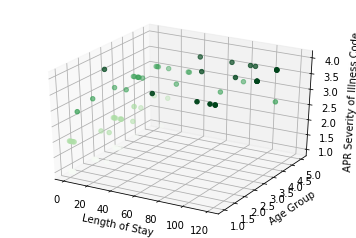

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

ax = plt.axes(projection = '3d')
ax.scatter3D(x2, x1, y, c = y, cmap = 'Greens')
ax.set_xlabel('Length of Stay')
ax.set_ylabel('Age Group')
ax.set_zlabel('APR Severity of Illness Code')

Text(0,0.5,'Age Group')

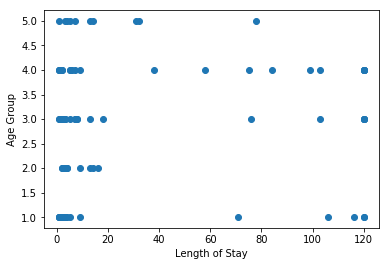

In [6]:
plt.scatter(x2,x1)
plt.xlabel('Length of Stay')
plt.ylabel('Age Group')

# Applying Decision Tree Classifier

In [7]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = features
Y = y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

cm = confusion_matrix(y_test, dtree_predictions)

In [8]:
from sklearn.metrics import accuracy_score

y_true = y_test
y_predict = []
for i in range(len(X_test)):
    y_predict.append(dtree_model.predict([X_test[i]])[0])
y_scores = y_predict
# print(y_scores)
# print(y_true)
print(len(features))
accuracy_score(y_true, y_scores)

80


0.5

# Applying SVM

In [9]:
from sklearn.model_selection import train_test_split

features_train, features_test, Y_train, Y_test = train_test_split(features, y, test_size = 0.1, random_state = 0)

clf = svm.SVC(gamma = 'auto')
clf.fit(features_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
clf.predict([[5,32]])

array([3])

In [11]:
from sklearn.metrics import accuracy_score
Y_true = Y_test
y_pred = []
for i in range(len(features_test)):
    y_pred.append(clf.predict([features_test[i]])[0])
Y_scores = y_pred
# print(y_scores)
# print(y_true)
print(len(features))
accuracy_score(y_true, y_scores)

80


0.5